In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import joblib
from astropy.table import Table
from pyrafspec.fitslist import load_multispec, specwcs, MultiSpecItem
from pyrafspec.readirafmultispec import readmultispec

In [2]:
def read_p200_spec(fname):
    ''' read spectrum observed by P200
    returns:
    ---------------
    wave
    flux
    fluxerr
    flux_norm
    flux_cont
    '''
    hdulist = fits.open(fname)
    flux0=hdulist[0].data
    try:
        flux = flux0[0][0]
        fluxerr = flux0[3][0]
    except: 
        flux = flux0
        fluxerr = np.zeros_like(flux)
    temp=hdulist[0].header['CRVAL1']
    step=hdulist[0].header['CD1_1']
    wave = temp + np.arange(hdulist[0].header['NAXIS1'])*step
    
    #flux_norm, flux_cont = normalization.normalize_spectrum_spline(wave, flux, niter=3)
    return wave, flux,fluxerr

# make lamp template

- fname_templatelate calibrated by iraf

In [3]:
fname_template = '../data/KECKHIRS/lamp-j3640016-ihdu-3_1d.fits'
lampirafdic = readmultispec(fname_template, reform=False)

Dispersion is order-4 Chebyshev polynomial
Correcting for redshift: z=0.000000


In [4]:
lampirafdic['wavelen'][:, 4:4000].shape

(13, 3996)

In [5]:
lampirafdic['wavelen'].shape

(13, 4070)

In [191]:
fname_obj = '../data/P200DBSP/P200_blue0059tbfe13_w.fits'
hdu_obj = fits.open(fname_obj)

In [48]:
#dump_obj = joblib.load('../data/P200DBSP/star-blue0059.fits.dump')
#dump_obj = joblib.load('/home/sdb216/sdOBdata/Documents/Feige64/data/spec/feige64_spec_all_20230210/P200feige64DATA-tolijiao/dump/star-blue0059.fits.dump')
#dump_lamp = joblib.load('../data/P200DBSP/lamp-blue0062.fits.dump')
dump_lamp = joblib.load('/home/sdb216/sdOBdata/Documents/Feige64/data/spec/feige64_spec_all_20230210/KECKDATAfeige64_tolijiao/Feige64_0205_KECK/dump/lamp-j3640016.fits-ihdu-3.dump')
#dump_obj['blaze_norm'] = np.array([ _/np.median(_) for _ in dump_obj['blaze'] ])

In [74]:
#wave, flux,fluxerr = read_p200_spec(fname_obj)

Text(0, 0.5, 'Flux/median')

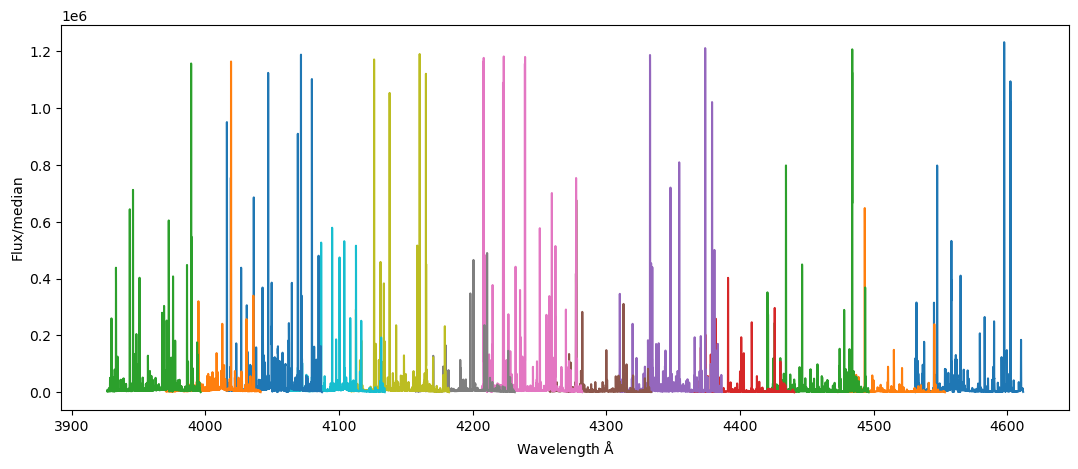

In [29]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
#plt.plot(wave, flux/np.median(flux), label='iraf')

plt.plot(lampirafdic['wavelen'].T,lampirafdic['flux'].T)

#_flux =( dump_obj['spec_extr']/dump_obj['blaze_norm'])[0]
#plt.plot(lampirafdic['wavelen'][0],_flux/np.median(_flux), label='pyexspec')

plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')

In [7]:
linelist = np.loadtxt('../data/KECKHIRS/thar.dat')

In [8]:
lampirafdic['wavelen']

array([[4530.73556496, 4530.75693561, 4530.77830541, ..., 4611.1609041 ,
        4611.17920456, 4611.19750435],
       [4473.43052445, 4473.45162774, 4473.47273032, ..., 4552.86570301,
        4552.88354149, 4552.90137906],
       [4417.51819094, 4417.53902918, 4417.55986682, ..., 4495.98591539,
        4496.00334627, 4496.02077608],
       ...,
       [4015.99719598, 4016.01598991, 4016.03478344, ..., 4087.4716394 ,
        4087.48759768, 4087.50355497],
       [3971.03598687, 3971.05453395, 3971.07308057, ..., 4041.72152155,
        4041.7375    , 4041.75347764],
       [3927.13744429, 3927.15574629, 3927.17404775, ..., 3997.05139579,
        3997.06743591, 3997.08347545]])

# save the lamp (FEAR arc for DBSP) template

In [45]:
thar_template = {}
thar_template['wave'] = lampirafdic['wavelen'][:, 4:4000]
thar_template['flux'] = lampirafdic['flux'][:, 4:4000]#dump_lamp['lamp1d']
thar_template['linelist'] = linelist
joblib.dump(thar_template, '../KECKHIRES/template/thar_template_ihdu-3.z')

['../KECKHIRES/template/thar_template_ihdu-3.z']

In [46]:
def plotline(x, y, stri=None, dy=0.15, sy=0.35, scolor='b', dcolor='b', rotation='90'):
    plt.plot([x, x], [y, y+dy], color=dcolor, lw=1)
    if stri is not None:
      plt.text(x, y+sy, stri, color=scolor, ha='center', va='center', rotation=rotation)

In [54]:
dump_lamp['wave_solu']

array([[4531.0170383 , 4531.03814959, 4531.05926047, ..., 4609.77523008,
        4609.79308942, 4609.81094762],
       [4473.642317  , 4473.66319597, 4473.68407453, ..., 4551.49463269,
        4551.51225508, 4551.52987631],
       [4417.68843863, 4417.70908756, 4417.72973608, ..., 4494.6537707 ,
        4494.67117357, 4494.68857528],
       ...,
       [4015.88568117, 4015.904577  , 4015.92347244, ..., 4086.30375373,
        4086.31964884, 4086.33554285],
       [3970.7236107 , 3970.74229895, 3970.76098686, ..., 4040.37541209,
        4040.39110238, 4040.40679158],
       [3926.53887683, 3926.55736022, 3926.57584332, ..., 3995.43233957,
        3995.4478109 , 3995.46328111]])

Text(0, 0.5, 'Flux/median')

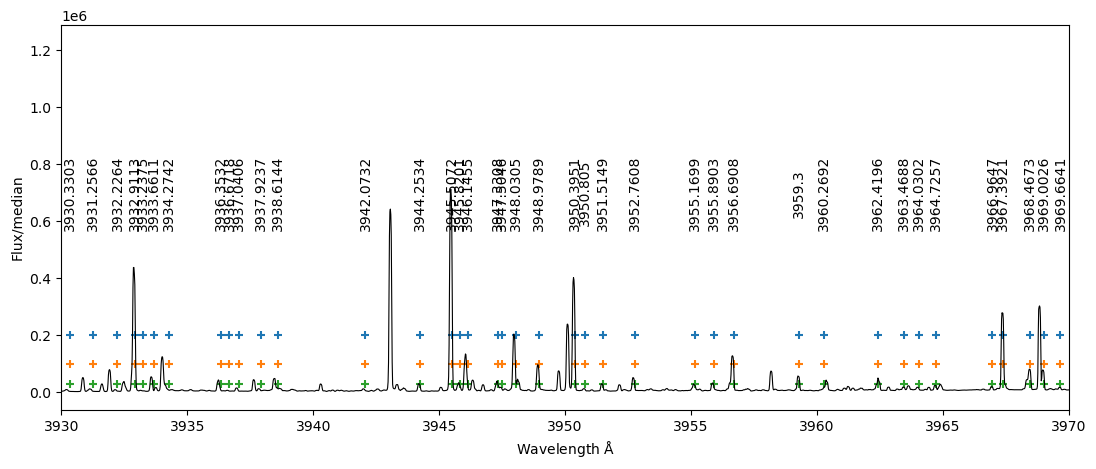

In [56]:

#flux_fear = dump_lamp['lamp1d'][0]
fig, ax = plt.subplots(1,1,figsize=(13,5))
#plt.plot(thar_template['wave'].T, thar_template['flux'].T)


#plt.plot(dump_lamp['wave_solu'].T, dump_lamp['lamp1d'].T, lw=0.8)
for _i, _wave in enumerate(dump_lamp['wave_solu']):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    plt.plot(_wave, dump_lamp['lamp1d'][_i], color=color, lw=0.8 )
#plt.plot(dump_lamp['wave_solu'][0], dump_lamp['lamp1d'][0], label='pyexspec')
_ind = (linelist > np.min(dump_lamp['wave_solu'])) & (linelist < np.max(dump_lamp['wave_solu']))
_linelist = linelist[_ind]
plt.scatter(_linelist, np.ones(len(_linelist))*200000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*100000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*30000, marker='+')


dw = 40
xlim = 3930+dw*0

_indxlim = (linelist >= xlim) & (linelist <=xlim+dw)
for _x in linelist[_indxlim]:
    plt.text(_x, 700000, f'{_x}', ha='center', va='center', rotation=90)


plt.xlim(xlim, xlim+dw)
#plt.ylim(0, 0.4e6)

#plt.legend()
plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')

# check template

Text(0, 0.5, 'Flux/median')

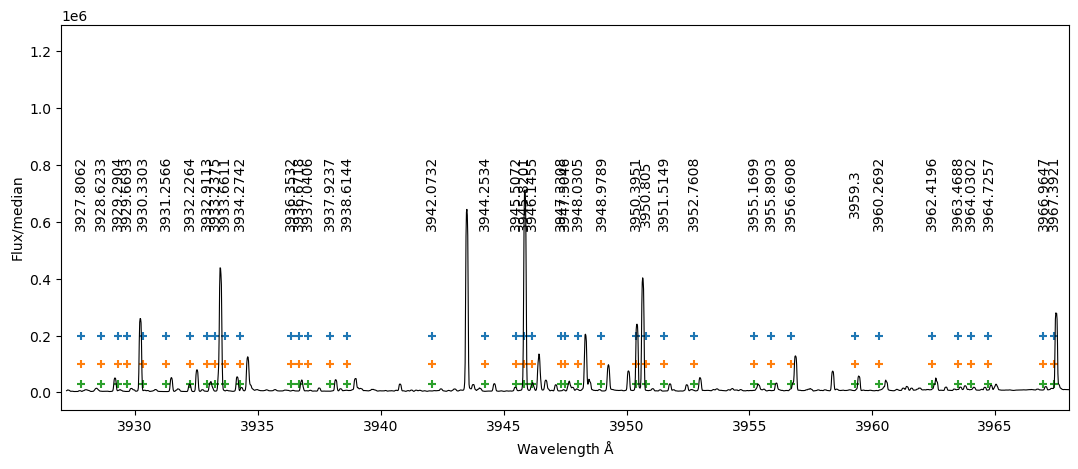

In [53]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
for _i, _wave in enumerate(thar_template['wave']):
    color ='k' if np.mod(_i, 2) == 0 else 'b'
    _flux = thar_template['flux'][_i]
    plt.plot(_wave, _flux, color=color, lw=0.8 )
#plt.plot(dump_lamp['wave_solu'][0], dump_lamp['lamp1d'][0], label='pyexspec')
_ind = (linelist > np.min(thar_template['wave'])) & (linelist < np.max(thar_template['wave']))
_linelist = linelist[_ind]
plt.scatter(_linelist, np.ones(len(_linelist))*200000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*100000, marker='+')
plt.scatter(_linelist, np.ones(len(_linelist))*30000, marker='+')


dw = 41
xlim = 3927+dw*0

_indxlim = (linelist >= xlim) & (linelist <=xlim+dw)
for _x in linelist[_indxlim]:
    plt.text(_x, 700000, f'{_x}', ha='center', va='center', rotation=90)


plt.xlim(xlim, xlim+dw)
#plt.ylim(0, 0.4e6)

#plt.legend()
plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')

In [21]:
thar_template['wave'], thar_template['flux']

(array([[4530.73556496, 4530.75693561, 4530.77830541, ..., 4611.1609041 ,
         4611.17920456, 4611.19750435],
        [4473.43052445, 4473.45162774, 4473.47273032, ..., 4552.86570301,
         4552.88354149, 4552.90137906],
        [4417.51819094, 4417.53902918, 4417.55986682, ..., 4495.98591539,
         4496.00334627, 4496.02077608],
        ...,
        [4015.99719598, 4016.01598991, 4016.03478344, ..., 4087.4716394 ,
         4087.48759768, 4087.50355497],
        [3971.03598687, 3971.05453395, 3971.07308057, ..., 4041.72152155,
         4041.7375    , 4041.75347764],
        [3927.13744429, 3927.15574629, 3927.17404775, ..., 3997.05139579,
         3997.06743591, 3997.08347545]]),
 array([[ 856.3136 ,  966.70325, 1071.8798 , ..., 2018.1582 , 1827.3647 ,
         1591.5779 ],
        [ 873.     ,  883.     ,  981.     , ...,  311.     ,  338.     ,
          322.     ],
        [2348.7192 , 2450.3115 , 2368.177  , ...,  422.8794 ,  436.71167,
          353.448  ],
        ...,


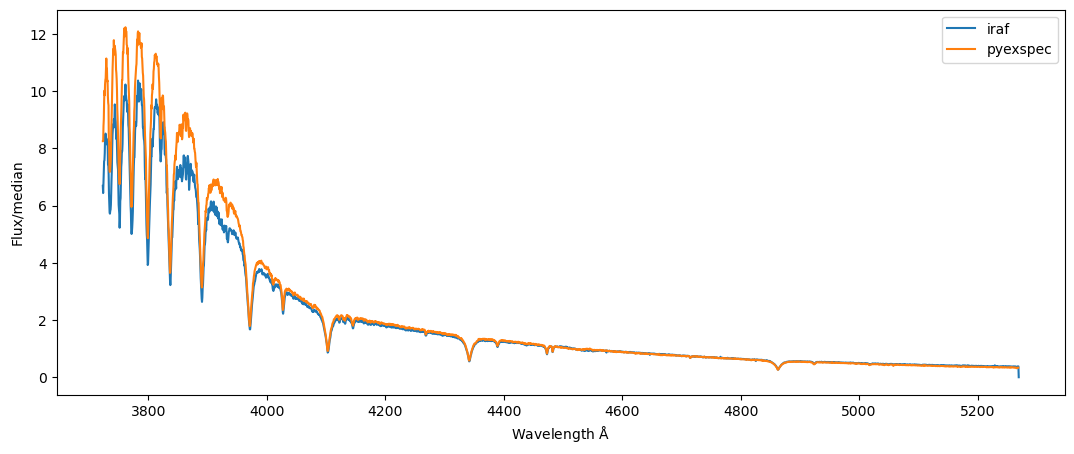

In [11]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
plt.plot(wave, flux/np.median(flux), label='iraf')

_flux =( dump_obj['spec_extr']/dump_obj['blaze_norm'])[0]
plt.plot(dump_lamp['wave_solu'][0],_flux/np.median(_flux), label='pyexspec')

plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


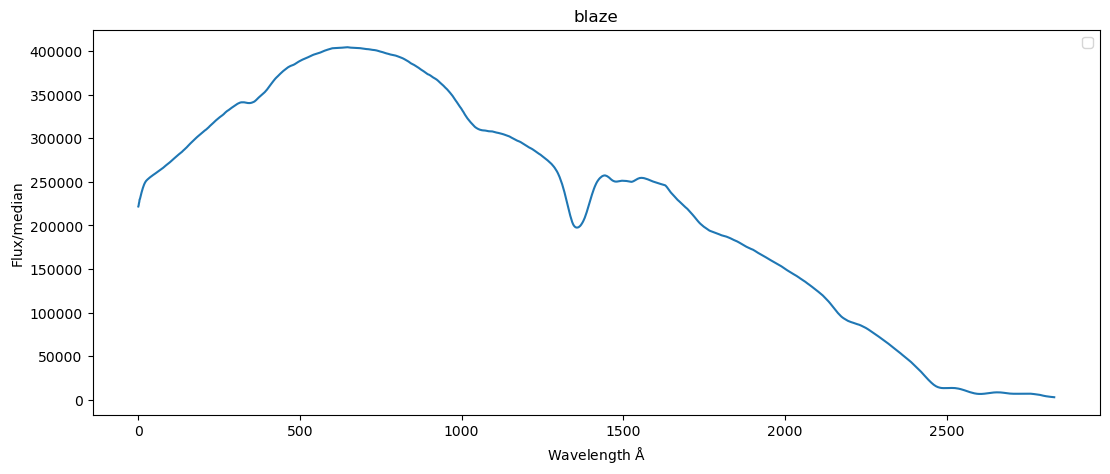

In [12]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
blaze = dump_obj['blaze'][0]/np.median(dump_obj['blaze'][0])
plt.plot(dump_obj['blaze'][0])

plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'Flux/median')
plt.title('blaze')
plt.legend()

/tmp/ipykernel_1220254/2732070853.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(flux/fluxerr, label='iraf')


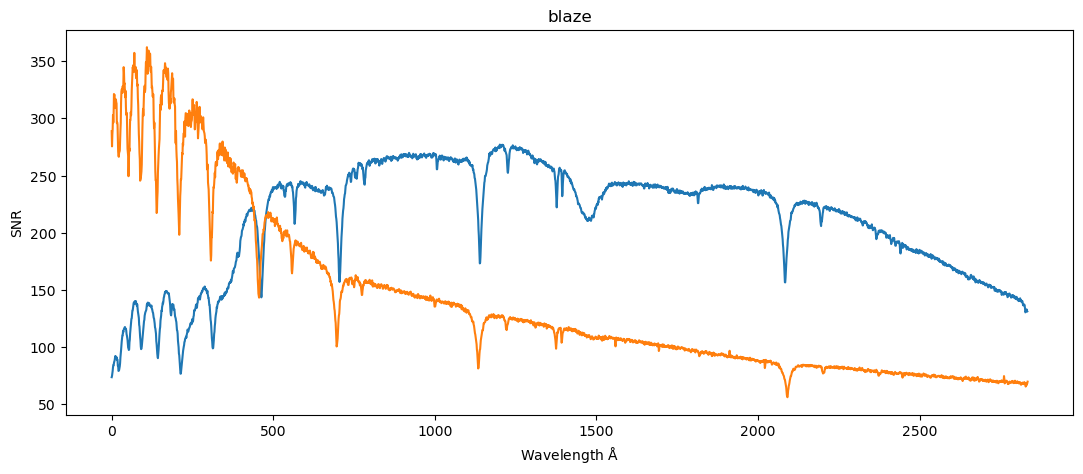

In [27]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
plt.plot((dump_obj['spec_extr'][0]/dump_obj['err_extr'][0])[::-1], label='pyexspec')
plt.plot(flux/fluxerr, label='iraf')

plt.xlabel(r'Wavelength $\rm {\AA}$')
plt.ylabel(r'SNR')
plt.title('blaze')
plt.show()

In [28]:
_ind = (linelist> 3700) & (linelist < 5300)
linelist[_ind]

array([3705.5657, 3709.2459, 3718.2065, 3719.9346, 3722.5625, 3727.6187,
       3729.3087, 3733.3169, 3734.8636, 3737.1313, 3745.5608, 3748.2617,
       3749.4847, 3758.2324, 3763.7885, 3767.1914, 3812.9641, 3815.8397,
       3820.4251, 3824.4436, 3825.8805, 3827.8226, 3834.2222, 3856.3717,
       3859.9114, 3868.5284, 3878.573 , 3886.282 , 3895.6558, 3899.7073,
       3902.9452, 3906.4794, 3920.2577, 3922.9115, 3925.7188, 3930.2962,
       3946.0971, 3948.9789, 3969.257 , 3979.3559, 3994.7918, 4005.2414,
       4033.8093, 4042.8937, 4044.4179, 4045.813 , 4052.9208, 4063.5939,
       4103.9121, 4118.5442, 4131.7235, 4143.8688, 4158.5905, 4164.1795,
       4198.3036, 4200.6745, 4216.1828, 4222.6373, 4237.2198, 4259.3619,
       4271.7593, 4277.5282, 4294.1243, 4300.1008, 4307.9015, 4315.0837,
       4325.7615, 4331.1995, 4333.5612, 4335.3379, 4337.0708, 4345.168 ,
       4348.064 , 4352.2049, 4362.0662, 4367.8316, 4375.9294, 4379.6668,
       4383.5445, 4385.0566, 4400.9863, 4404.7499, 

# calibrate wavelength by IRAF
- write the follow code into calibrate_wave.py file & python python calibrate_wave.py

# use iraf 
- $cl --> noao --> imred --> echel --> echelle --> ecidentify or dispcor
- edit parameter: epa eci

k
- k --> down to next order 
- j --> up to previous order or (check rms) 
- h --> leave rms 
- d --> delete points 
- m --> mark points 
- f --> fit curve 
- w&e -> 
- - e --> select zone (xaixs invert: right_bottom --> left_top; yaxis_invert: left_top-->right_bottom)
- w&a --> restore image
- q --> quit



In [197]:
fname_lamp = '../data/P200DBSP/lamp-blue0062.fits.dump'

dump_lamp = joblib.load(fname_lamp)
_header = dump_lamp['header']
_data = np.array(dump_lamp['lamp1d'][0], dtype=np.float32)
hdulamp = fits.HDUList([fits.PrimaryHDU(header=_header, data=_data)])

hdulamp.writeto('../data/P200DBSP/lamp-blue0062.fits', overwrite=True)

In [3]:
!cp /share/data/sdOBdata/Documents/Feige64/data/spec/feige64_spec_all_20230210/P200feige64DATA-tolijiao/dump/lamp-blue0062.fits.dump ../data/P200DBSP/

/bin/bash: /share/data/lijiao/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [195]:
dump_lamp['lamp1d']

array([[3484.49103678,  478.19267972,  104.40395885, ...,   97.5       ,
         313.        , 1325.5       ]])

In [1]:
pwd

'/share/data/lijiao/Documents/pyexspec/ipynb'